## Fetch Rewards Assessment - Data Analytics
## Submission - 5th Feb 2023
## Name- Sanjana Pai
## University Career Fair - University of Illinois at Urbana Champaign
## Used SQLITE AND PYTHON

In [119]:
#importing python packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
#Using sqlite through python using "pandasql import sqldf"

In [120]:
#loading the data files into dataframes using pandas 
data_brands= pd.read_csv("/Users/sanjana_pai/Documents/Takehome_Data_January_2023/brands.csv")
data_receipt_items= pd.read_csv("/Users/sanjana_pai/Documents/Takehome_Data_January_2023/receipt_items.csv")
data_receipts= pd.read_csv("/Users/sanjana_pai/Documents/Takehome_Data_January_2023/receipts.csv")
data_users= pd.read_csv("/Users/sanjana_pai/Documents/Takehome_Data_January_2023/users.csv")

In [121]:
#Checking for null values
print(data_brands.isna().any())

ID                   False
BARCODE              False
BRAND_CODE            True
CPG_ID               False
CATEGORY              True
CATEGORY_CODE         True
NAME                 False
ROMANCE_TEXT          True
RELATED_BRAND_IDS     True
dtype: bool


In [122]:
#Checking for null values
print(data_receipt_items.isna().any())

REWARDS_RECEIPT_ID            False
ITEM_INDEX                    False
REWARDS_RECEIPT_ITEM_ID       False
DESCRIPTION                    True
BARCODE                        True
BRAND_CODE                     True
QUANTITY_PURCHASED             True
TOTAL_FINAL_PRICE              True
POINTS_EARNED                  True
REWARDS_GROUP                  True
ORIGINAL_RECEIPT_ITEM_TEXT     True
MODIFY_DATE                   False
dtype: bool


In [123]:
#Checking for null values
print(data_receipts.isna().any())

ID                           False
STORE_NAME                    True
PURCHASE_DATE                 True
PURCHASE_TIME                 True
DATE_SCANNED                 False
TOTAL_SPENT                   True
REWARDS_RECEIPT_STATUS       False
USER_ID                      False
USER_VIEWED                   True
PURCHASED_ITEM_COUNT          True
CREATE_DATE                  False
PENDING_DATE                  True
MODIFY_DATE                   True
FLAGGED_DATE                  True
PROCESSED_DATE                True
FINISHED_DATE                 True
REJECTED_DATE                 True
NEEDS_FETCH_REVIEW            True
DIGITAL_RECEIPT              False
DELETED                       True
NON_POINT_EARNING_RECEIPT     True
dtype: bool


In [124]:
#Checking for null values
print(data_users.isna().any())

CREATED_DATE          False
BIRTH_DATE            False
GENDER                False
LAST_REWARDS_LOGIN    False
STATE                 False
SIGN_UP_PLATFORM       True
SIGN_UP_SOURCE        False
ID                    False
dtype: bool


In [125]:
print(data_brands.columns)

Index(['ID', 'BARCODE', 'BRAND_CODE', 'CPG_ID', 'CATEGORY', 'CATEGORY_CODE',
       'NAME', 'ROMANCE_TEXT', 'RELATED_BRAND_IDS'],
      dtype='object')


In [126]:
print(data_receipt_items.columns)

Index(['REWARDS_RECEIPT_ID', 'ITEM_INDEX', 'REWARDS_RECEIPT_ITEM_ID',
       'DESCRIPTION', 'BARCODE', 'BRAND_CODE', 'QUANTITY_PURCHASED',
       'TOTAL_FINAL_PRICE', 'POINTS_EARNED', 'REWARDS_GROUP',
       'ORIGINAL_RECEIPT_ITEM_TEXT', 'MODIFY_DATE'],
      dtype='object')


In [127]:
print(data_receipts.columns)

Index(['ID', 'STORE_NAME', 'PURCHASE_DATE', 'PURCHASE_TIME', 'DATE_SCANNED',
       'TOTAL_SPENT', 'REWARDS_RECEIPT_STATUS', 'USER_ID', 'USER_VIEWED',
       'PURCHASED_ITEM_COUNT', 'CREATE_DATE', 'PENDING_DATE', 'MODIFY_DATE',
       'FLAGGED_DATE', 'PROCESSED_DATE', 'FINISHED_DATE', 'REJECTED_DATE',
       'NEEDS_FETCH_REVIEW', 'DIGITAL_RECEIPT', 'DELETED',
       'NON_POINT_EARNING_RECEIPT'],
      dtype='object')


In [128]:
print(data_users.columns)

Index(['CREATED_DATE', 'BIRTH_DATE', 'GENDER', 'LAST_REWARDS_LOGIN', 'STATE',
       'SIGN_UP_PLATFORM', 'SIGN_UP_SOURCE', 'ID'],
      dtype='object')


## Question 1: Which brand saw the most dollars spent in the month of June?

SELECT brand_code, SUM(total_final_price) FROM receipt_items WHERE brand_code IS NOT NULL AND strftime('%m', modify_date)='06' GROUP BY brand_code ORDER BY SUM(total_final_price) DESC LIMIT 1

In [129]:
q1 = sqldf("SELECT brand_code, SUM(total_final_price) FROM data_receipt_items WHERE brand_code IS NOT NULL AND strftime('%m', modify_date)='06' GROUP BY brand_code ORDER BY SUM(total_final_price) DESC LIMIT 1")

In [130]:
q1

,BRAND_CODE,SUM(total_final_price)
0,KIRKLAND SIGNATURE,2610.67


## Solution for question 1 : KIRKLAND SIGNATURE

## Question 2: Which user spent the most money in the month of August?

SELECT user_id, SUM(total_spent) FROM receipts WHERE strftime('%m', modify_date)='08' GROUP BY user_id ORDER BY SUM(total_spent) DESC LIMIT 1

In [131]:
q2 = sqldf("SELECT user_id, SUM(total_spent) FROM data_receipts WHERE strftime('%m', modify_date)='08' GROUP BY user_id ORDER BY SUM(total_spent) DESC LIMIT 1")
q2

,USER_ID,SUM(total_spent)
0,609ab37f7a2e8f2f95ae968f,157719.27


## Solution for question 2: 609ab37f7a2e8f2f95ae968f	

## Question 3: What user bought the most expensive item?


SELECT user_id,MAX(total_spent/purchased_item_count) FROM receipts WHERE total_spent IS NOT 0 AND purchased_item_count IS NOT 0 GROUP BY user_id ORDER BY MAX(total_spent/purchased_item_count) DESC LIMIT 1

In [132]:
q3 = sqldf("SELECT user_id,MAX(total_spent/purchased_item_count) FROM data_receipts WHERE total_spent IS NOT 0 AND purchased_item_count IS NOT 0 GROUP BY user_id ORDER BY MAX(total_spent/purchased_item_count) DESC LIMIT 1")
q3

,USER_ID,MAX(total_spent/purchased_item_count)
0,609ab37f7a2e8f2f95ae968f,15502.53


## Solution for question 3: 609ab37f7a2e8f2f95ae968f

## Question 4: What is the name of the most expensive item purchased?


SELECT id,MAX(total_spent/purchased_item_count) FROM receipts WHERE total_spent IS NOT 0 AND purchased_item_count IS NOT 0 GROUP BY user_id ORDER BY MAX(total_spent/purchased_item_count) DESC LIMIT 1

In [133]:
q4 = sqldf("SELECT id,MAX(total_spent/purchased_item_count) FROM data_receipts WHERE total_spent IS NOT 0 AND purchased_item_count IS NOT 0 GROUP BY user_id ORDER BY MAX(total_spent/purchased_item_count) DESC LIMIT 1")


In [134]:
q4

,ID,MAX(total_spent/purchased_item_count)
0,612565c70a720cbdfd02a11b,15502.53


## Solution for question 4: 612565c70a720cbdfd02a11b	

## Question 5: How many users scanned in each month?


SELECT count(distinct u.id),strftime('%m', date_scanned) as month from receipts dr JOIN users u on u.id=dr.user_id group by strftime('%m', date_scanned)

In [135]:
q5=sqldf("SELECT count(distinct u.id),strftime('%m', date_scanned) as month from data_receipts dr join data_users u on u.id=dr.user_id group by strftime('%m', date_scanned)")
q5

,count(distinct u.id),month
0,97,01
1,87,02
2,89,03
3,90,04
4,88,05
5,88,06
6,88,07
7,88,08
8,88,09
9,91,10


## Solution for question 5 :
## count(users) month
## 97	         01
## 87	         02
## 89	         03
## 90	         04
## 88	         05
## 88	         06
## 88	         07
## 88	         08
## 88	         09
## 91	         10
## 93	         11
## 98	         12


# Choose something noteworthy about the data and share with a non-technical stakeholder


## 1) From Receipts dataset we can infer the status of receipts

#### From the below histogram we can infer that most of the receipts are in "FINISHED" status

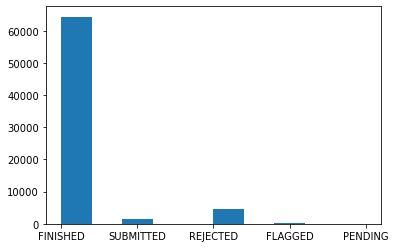

In [137]:
plt.hist(data_receipts['REWARDS_RECEIPT_STATUS'])
plt.show()

## 2) This is a word cloud to represent the store from which most transactions take place

#### We can infer that most transactions happen from Walmart, Amazon,Traget in that order

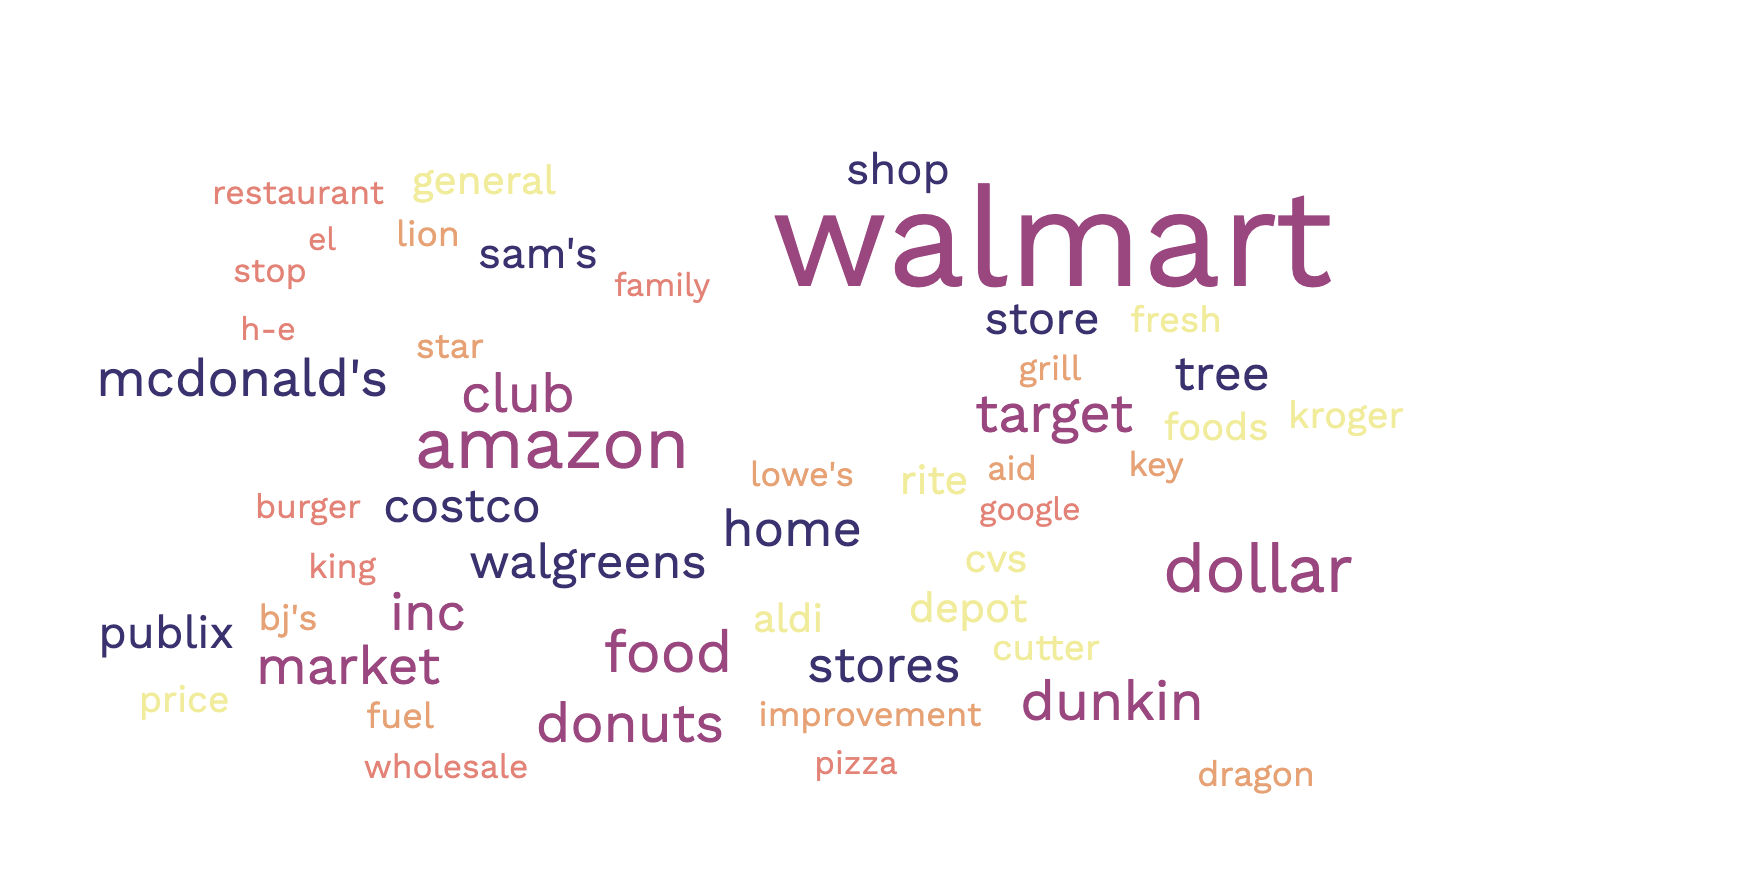

## This is a word cloud that represents the category of items that are sold the most

#### From the below word cloud it can be observed that Snacks, beverages,frozen and refregirated items are most sold followed by a few others 

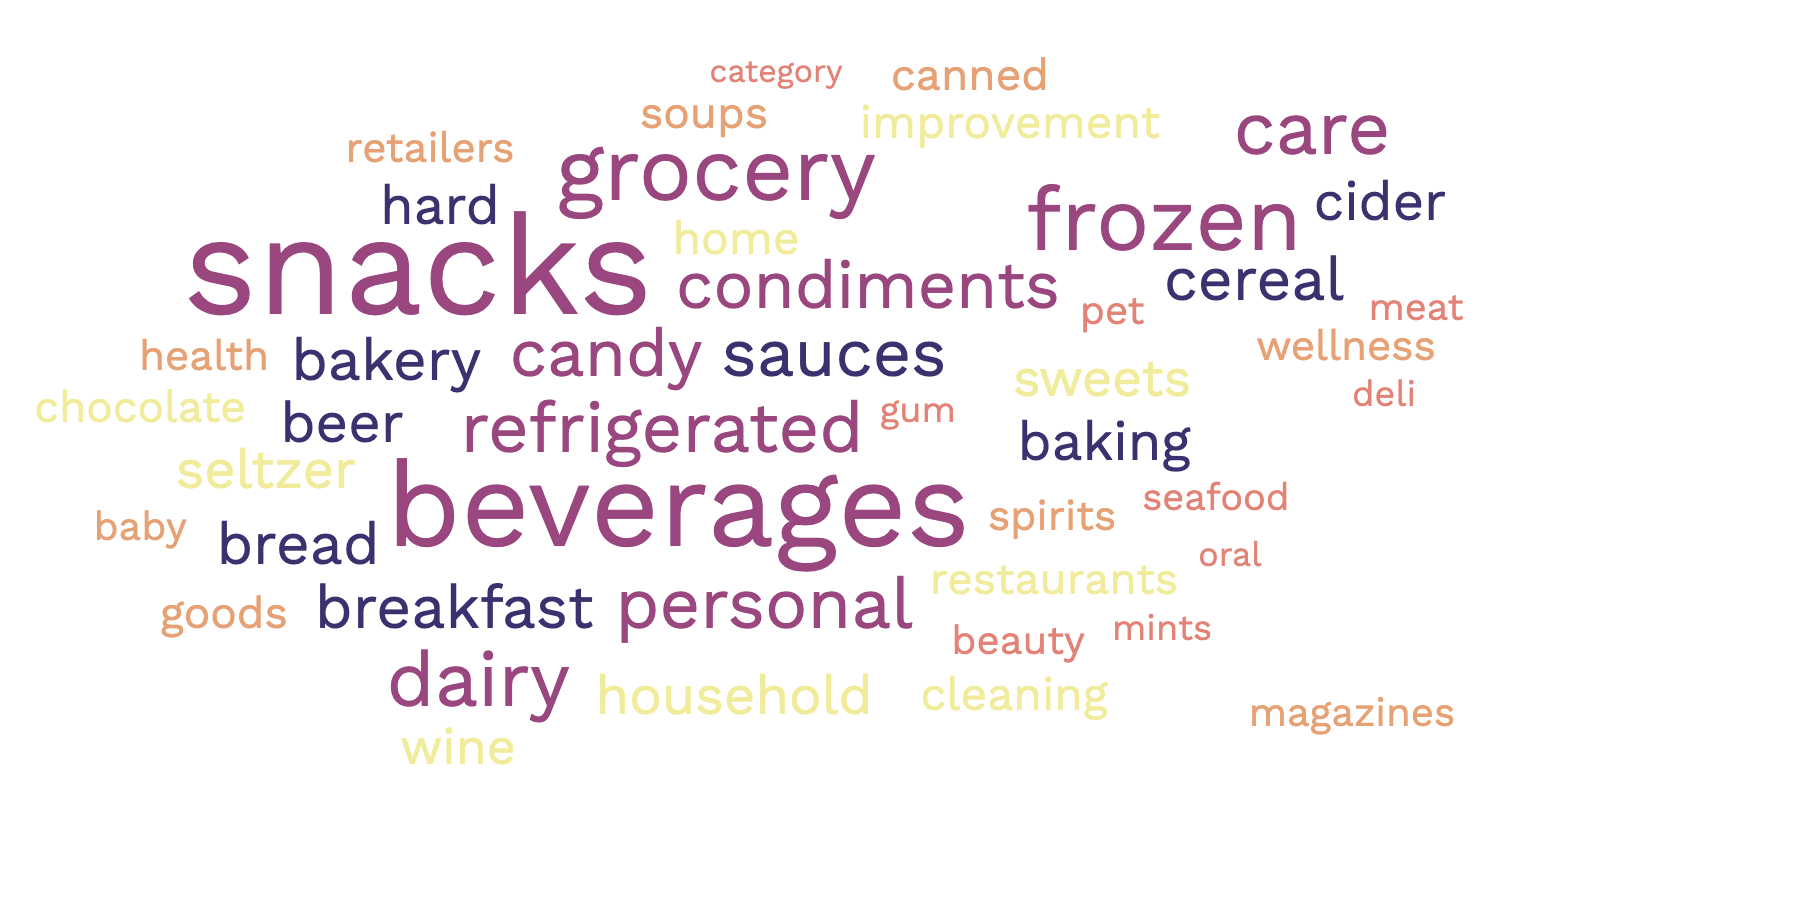